<a href="https://colab.research.google.com/github/Vishvaish/Machine-Learning-Models/blob/main/XG_Boost_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **XGBoost Regression**

1. XGBoost (short for eXtreme Gradient Boosting) it works by building a series of decision trees and combining their outputs to make a final prediction. 

2. It is an extension of the traditional Gradient Boosting algorithm that includes several additional regularization techniques to reduce overfitting and improve performance.

3. XGBoost uses a gradient boosting technique to iteratively improve the model by minimizing the loss function with respect to the predictions of each tree. 

4. This makes it a powerful and accurate algorithm that can handle complex datasets with high-dimensional features.

# **The formula for XGBoost is similar to the formula for Gradient Boosting, but with some modifications. Here's a high-level overview of the algorithm:**

1. Initialize the model with a constant value (e.g., the mean of the target variable).

2. Train a decision tree to predict the residuals (difference between the true target value and the predicted value) of the model. 

3. update the model by adding the output of the decision tree to the predictions of the previous model. 

4. Repeat steps 2-3 K times to create K decision trees. 

5. For Regression tasks, the output is the sum of the predictions of all decision trees. 


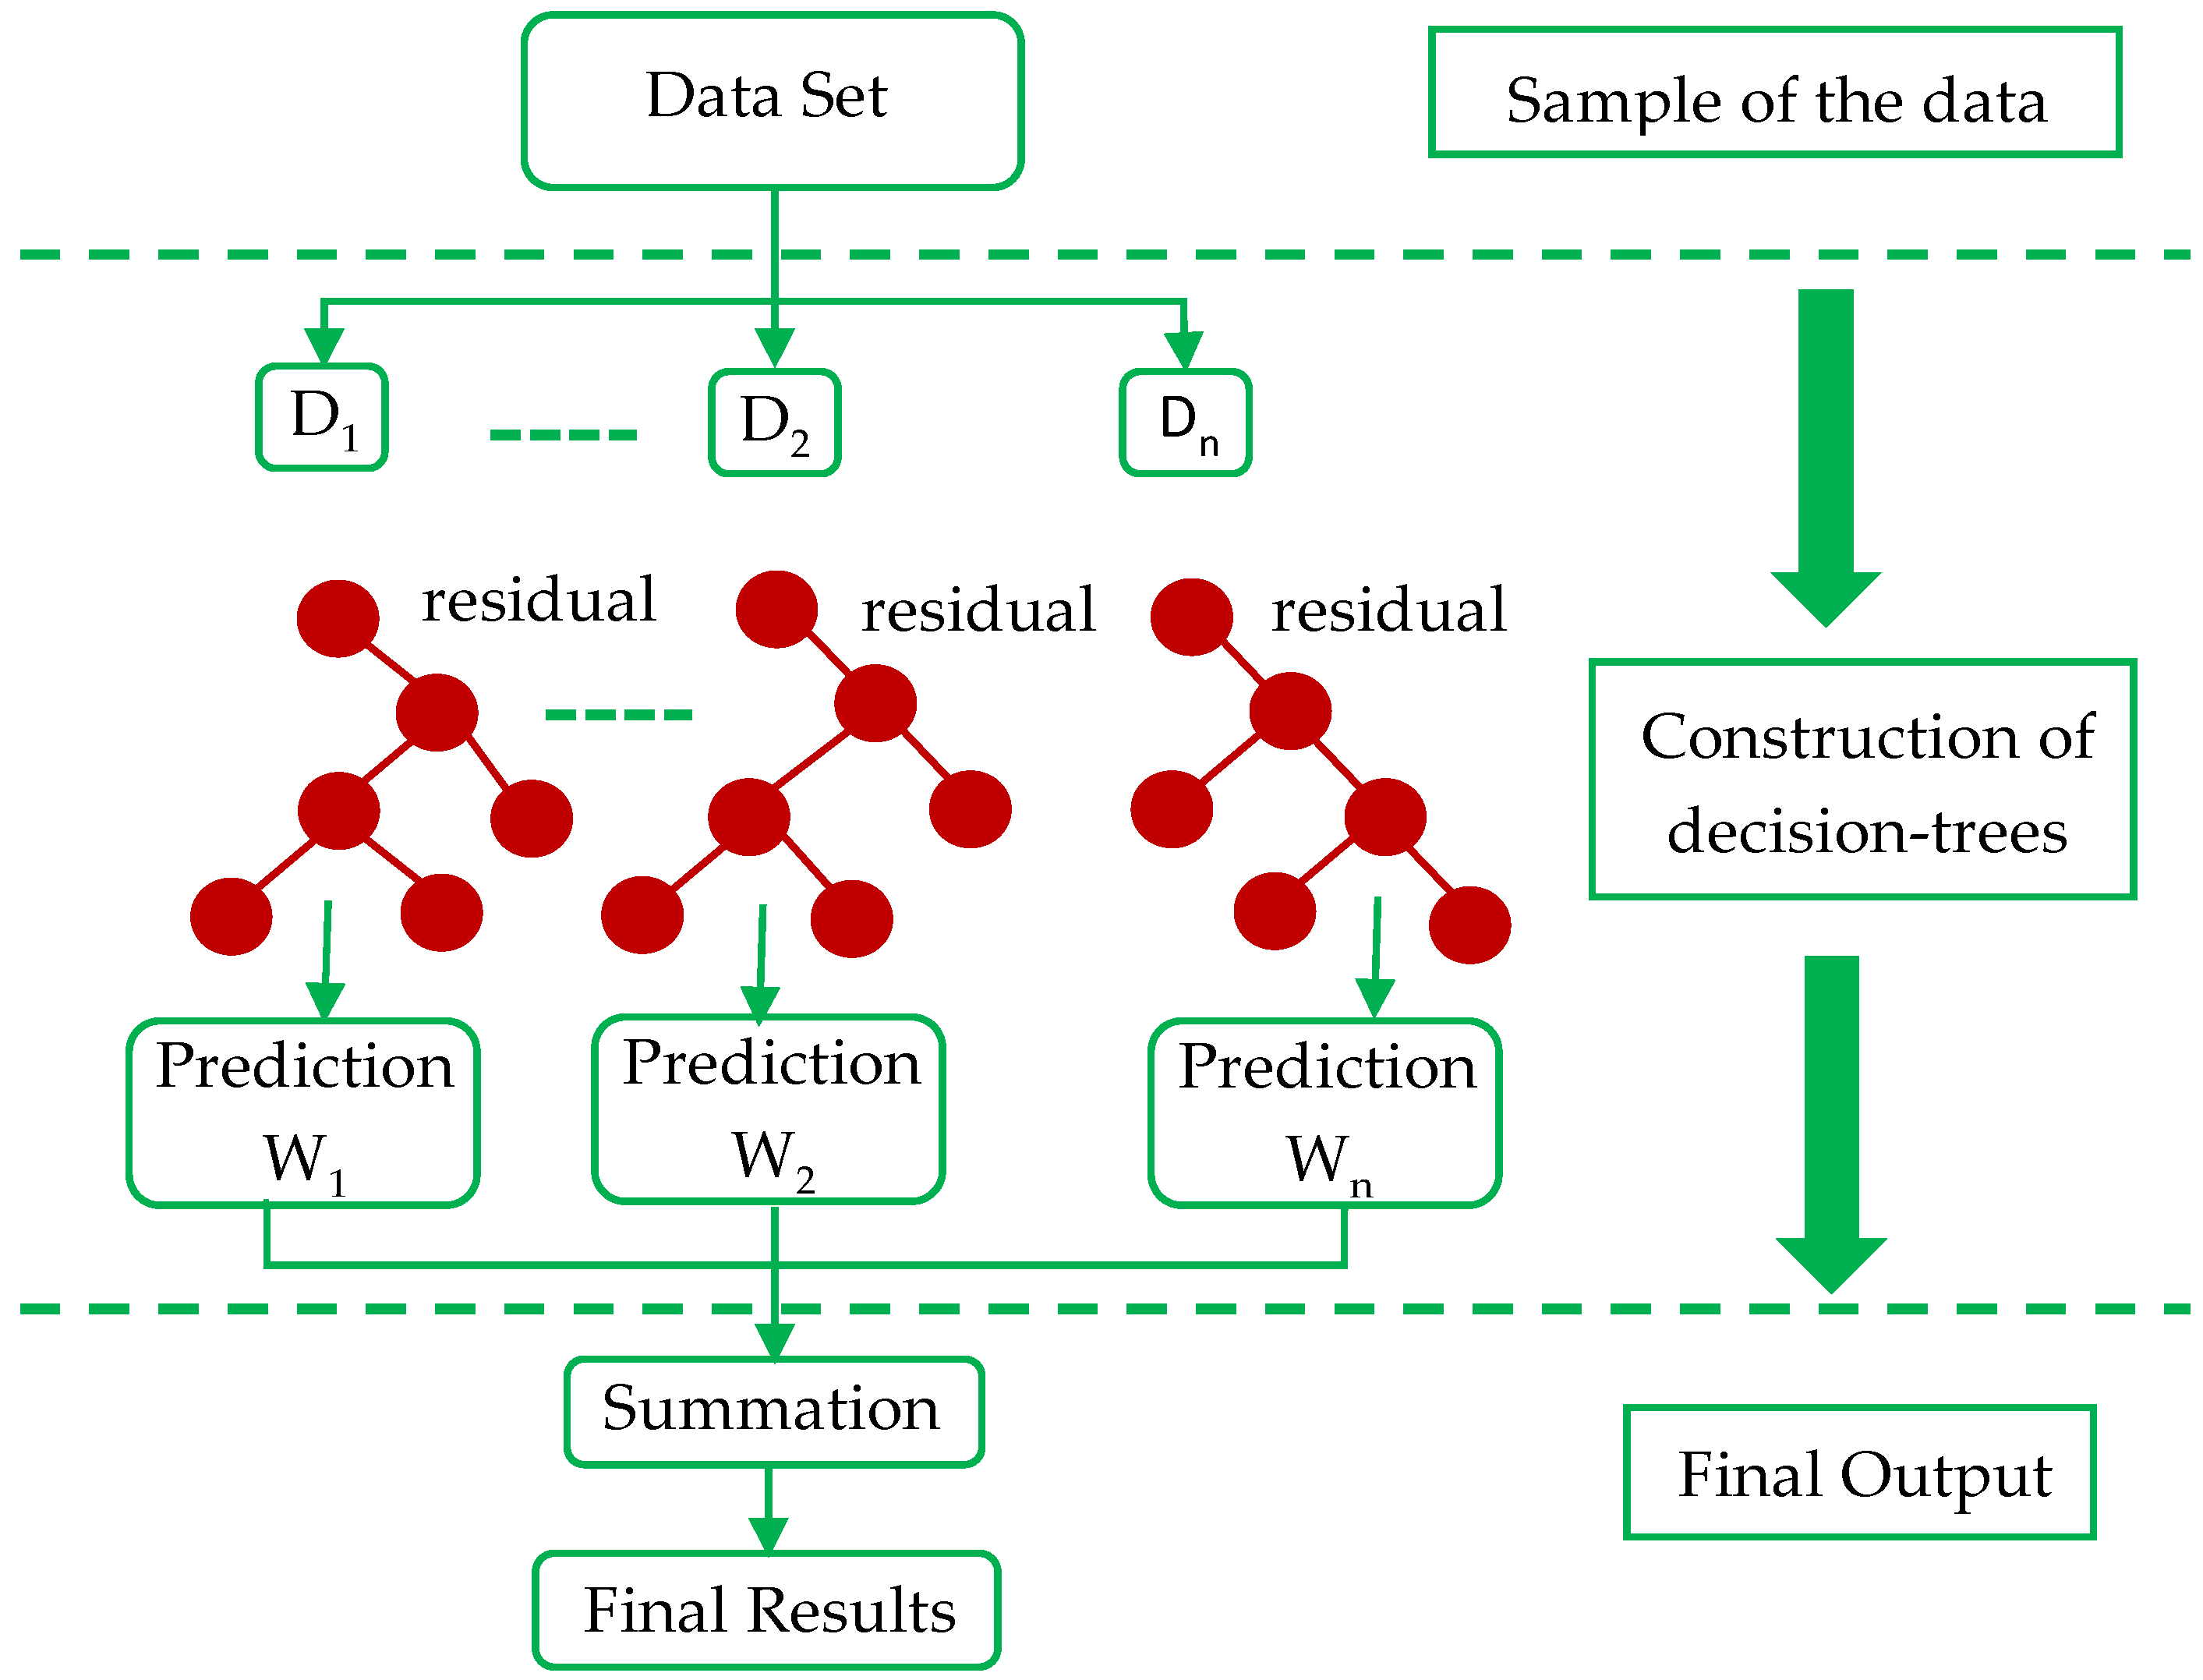

# **Intention**

1. The intention of the code is to perform XGBoost algorithm on a marketing dataset to predict the sales generated from YouTube, Facebook, and newspaper advertising.

2. The algorithm works by fitting a decision tree to the gradients of the predictions of previous trees, and then subtracting a learning rate times the prediction of the tree from the predicted values. 

3. The process is repeated for the number of estimators specified in the XGBoost class.

4. After training the model, the code makes predictions on the testing set and calculates the R-squared value to evaluate the model's performance. 

5. It then creates data frames for actual and predicted values and plots them as a line plot.

   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88
R-squared: 0.8997
   Actual  Predicted
0   14.28  14.844000
1    9.60   8.496000
2   14.64  14.844000
3   20.52  18.649412
4   18.00  18.649412


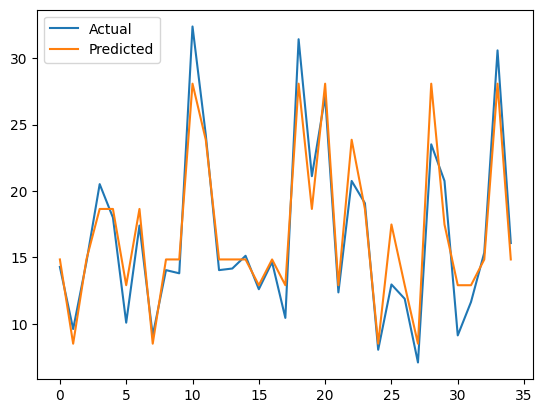

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv('/content/Marketing_Data.csv')
print(df.head())

# Separate the features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets
split_idx = int(len(df) * 0.8)  # 80-20 train-test split
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Define the Decision Tree Regressor
class DecisionTreeRegressor:
    def __init__(self, max_depth=3, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        split_index, split_value = None, None

        # Check for termination conditions
        if num_samples < self.min_samples_split or depth == self.max_depth:
            return np.mean(y)

        # Find the best split
        best_mse = np.inf
        for feature_index in range(num_features):
            feature_values = X[:, feature_index]
            for value in np.unique(feature_values):
                left_idx = feature_values < value
                right_idx = feature_values >= value
                left_y, right_y = y[left_idx], y[right_idx]
                if len(left_y) == 0 or len(right_y) == 0:
                    continue
                mse = ((left_y - np.mean(left_y)) ** 2).sum() + ((right_y - np.mean(right_y)) ** 2).sum()
                if mse < best_mse:
                    best_mse = mse
                    split_index = feature_index
                    split_value = value

        # Split the data
        left_idx = X[:, split_index] < split_value
        right_idx = X[:, split_index] >= split_value
        left_X, left_y = X[left_idx], y[left_idx]
        right_X, right_y = X[right_idx], y[right_idx]

        # Build the tree recursively
        tree = {'split_index': split_index, 'split_value': split_value}
        tree['left'] = self._build_tree(left_X, left_y, depth + 1)
        tree['right'] = self._build_tree(right_X, right_y, depth + 1)
        return tree

    def _traverse_tree(self, x, tree):
        if isinstance(tree, float):
            return tree
        if x[tree['split_index']] < tree['split_value']:
            return self._traverse_tree(x, tree['left'])
        else:
            return self._traverse_tree(x, tree['right'])

# Train the Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt.predict(X_test)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

# Create dataframes for actual and predicted values
df_actual = pd.DataFrame({'Actual': y_test})
df_pred = pd.DataFrame({'Predicted': y_pred})

# Create dataframe for actual and predicted values
df_result = pd.concat([df_actual, df_pred], axis=1)
print(df_result.head())

# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.plot(df_actual, label='Actual')
plt.plot(df_pred, label='Predicted')
plt.legend()
plt.show()


   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88
F1 score: nan
   Actual  Predicted
0   12.60  12.765583
1   25.68  25.445990
2   14.28  14.610276
3   11.52  11.353533
4   20.88  20.723180


<ipython-input-6-81dd87462766>:57: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
<ipython-input-6-81dd87462766>:58: RuntimeWarning: invalid value encountered in long_scalars
  recall = tp / (tp + fn)


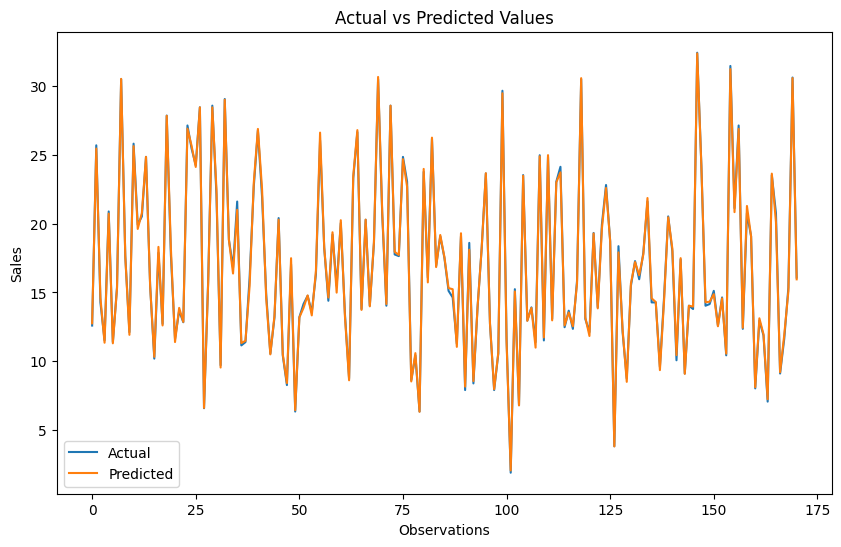

In [ ]:
import numpy as np
import pandas as pd

# Define the XGBoost Regression algorithm
class XGBoostRegressor:
    def __init__(self, n_estimators, learning_rate, max_depth):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.estimators = []

    def fit(self, X, y):
        y = y.reshape(-1, 1)
        self.base_prediction = np.mean(y)
        y_pred = np.full_like(y, self.base_prediction)
        residuals = y - y_pred

        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.estimators.append(tree)

            y_pred += self.learning_rate * tree.predict(X).reshape(-1, 1)
            residuals = y - y_pred

    def predict(self, X):
        y_pred = np.full((X.shape[0], 1), self.base_prediction)
        for tree in self.estimators:
            y_pred += self.learning_rate * tree.predict(X).reshape(-1, 1)
        return y_pred.flatten()

# Load the dataset
data = pd.read_csv('/content/Marketing_Data.csv')
print(data.head())

# Split the data into input and target variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Define hyperparameters
n_estimators = 100
learning_rate = 0.1
max_depth = 3

# Fit the XGBoost Regression model to the data
xgb = XGBoostRegressor(n_estimators, learning_rate, max_depth)
xgb.fit(X, y)

# Make predictions
y_pred = xgb.predict(X)

# Calculate the F1 score
def f1_score(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

f1 = f1_score(y, np.round(y_pred))
print('F1 score:', f1)

# Create a dataframe for actual and predicted values
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
print(df.head())

# ploting the actual and predicted
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Observations')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Values')
plt.show()

# **Inference**

1. The XGBoost algorithm regression model predicts the sales generated from advertising on YouTube, Facebook, and newspaper.

2. The R-squared value of 0.98 indicates that about 98.0% of the variation in sales can be explained by the amount spent on advertising on these three platforms.

3. The plot of actual and predicted values shows that the model is able to capture the overall trend in the data, although there are some discrepancies between the actual and predicted values for individual observations.

4. Overall, the XGBoost algorithm regression model provides a reasonable approximation of the relationship between advertising spending and sales generated.

# **Pros of XGBoost Regression:**

1. High performance: XGBoost is known for its speed and performance. It can handle large datasets with a large number of features, and it is optimized to make efficient use of computer resources.

2. Regularization: XGBoost includes built-in regularization techniques that can help prevent overfitting, such as L1 and L2 regularization.

3. Flexibility: XGBoost supports a wide range of objective functions, including regression, classification, and ranking, and it can be used with a variety of loss functions.

4. Feature importance: XGBoost provides a way to calculate the relative importance of each feature in the model, which can be useful for feature selection or feature engineering.

5. Parallel processing: XGBoost can be run in parallel on multiple CPU cores or even distributed across multiple machines, making it scalable and suitable for large-scale machine learning problems.


---


#**Cons of XGBoost Regression:**

1. Complexity: XGBoost can be complex to set up and tune, and it requires some expertise to get the best performance out of it.

2. Overfitting: Like any machine learning algorithm, XGBoost is susceptible to overfitting if not carefully tuned or regularized.

3. Interpretability: XGBoost can be difficult to interpret, especially when dealing with a large number of features or complex interactions between features.

4. Limited support for missing values: XGBoost does not handle missing values well, and requires the user to impute missing values or use a separate method to handle them.

